In [7]:
import json
import numpy as np

files = ["dataset_1.json", "dataset_2.json", "dataset_3.json"]
datalist = []

for file in files:
    with open(file, "r") as f:
        datalist.append(json.load(f))  # Store each file's data

datasets = np.array([0,0,0])  

for i in range(3):
    datasets[i] = np.sum(datalist[i])      #getting total number of heads


print(datasets)



[196 203 142]


/tmp/ipykernel_91883/929769441.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return (gamma(N + 2) / (gamma(M + 1) * gamma(N - M + 1))) * p**M * (1 - p)**(N - M) * comb(N,M)


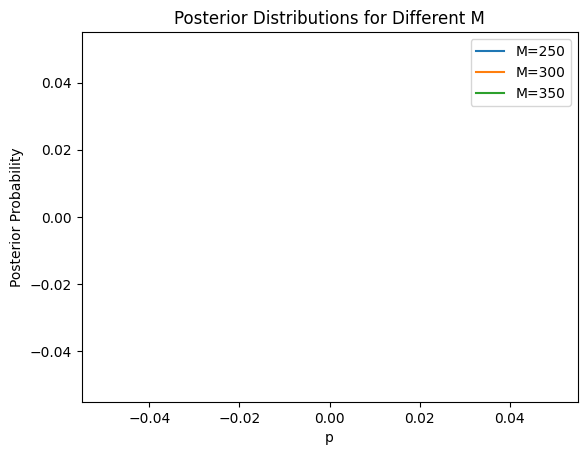

For M=250: Expectation=0.5, Variance=0.0004970178926441351
For M=300: Expectation=0.599601593625498, Variance=0.0004772952734537995
For M=350: Expectation=0.6992031872509961, Variance=0.00041812741588279247
Batch 1: Expectation=17.326923076923077, Variance=-5.337647928994083, Fisher Information=0.019999999999999962
Batch 2: Expectation=0.019230769230769232, Variance=0.00035586691972758737, Fisher Information=0.02
Batch 3: Expectation=0.019230769230769232, Variance=0.00035586691972758737, Fisher Information=0.02
Batch 4: Expectation=0.019230769230769232, Variance=0.00035586691972758737, Fisher Information=0.02
Batch 5: Expectation=0.019230769230769232, Variance=0.00035586691972758737, Fisher Information=0.02
Batch 6: Expectation=0.019230769230769232, Variance=0.00035586691972758737, Fisher Information=0.02
Batch 7: Expectation=0.019230769230769232, Variance=0.00035586691972758737, Fisher Information=0.02
Batch 8: Expectation=0.019230769230769232, Variance=0.00035586691972758737, Fisher 

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import beta, gamma
from scipy.stats import beta as beta_dist
from math import comb

# Assuming datasets are loaded as lists of heads counts
# datasets = [dataset1, dataset2, dataset3]  # Replace with actual data loading

def likelihood(M, N, p):
    return (gamma(N + 2) / (gamma(M + 1) * gamma(N - M + 1))) * p**M * (1 - p)**(N - M) * comb(N,M)

def posterior(M, N, p):
    return likelihood(M, N, p) * 1 / N  # Uniform prior P(p) = 1/N

def expectation_variance(M, N):
    alpha = M + 1
    beta_param = N - M + 1
    expectation = alpha / (alpha + beta_param)
    variance = (alpha * beta_param) / ((alpha + beta_param)**2 * (alpha + beta_param + 1))
    return expectation, variance

def fisher_information(M, N):
    alpha = M + 1
    beta_param = N - M + 1
    return (alpha - 1) / (alpha + beta_param - 2)**2 + (beta_param - 1) / (alpha + beta_param - 2)**2

N = 500
batch_size = 50
p_values = np.linspace(0.01, 0.99, 1000)

for M in dataset:
    posterior_values = [posterior(M, N, p) for p in p_values]
    plt.plot(p_values, posterior_values, label=f'M={M}')

plt.xlabel('p')
plt.ylabel('Posterior Probability')
plt.title('Posterior Distributions for Different M')
plt.legend()
plt.show()

for M in dataset:
    exp, var = expectation_variance(M, N)
    print(f'For M={M}: Expectation={exp}, Variance={var}')

# Batch processing
for i in range(0, N, batch_size):
    batch_M = sum(dataset[i:i+batch_size])
    batch_N = batch_size
    exp, var = expectation_variance(batch_M, batch_N)
    fisher = fisher_information(batch_M, batch_N)
    print(f'Batch {i//batch_size + 1}: Expectation={exp}, Variance={var}, Fisher Information={fisher}')


#overflow issue i think